#Implementing Inception-V3 Model
- Implement pneumonia prediction - classification model using InceptionV3, with imagenet weights
- Load the Train and Test data
- Create the model with partial learning for the top layers to improve prediction accuracy
- Configure Hyperparameters for better accuracy
- Run the model for appropriate number of epochs so that the model does not overfit or under fit
- Tune the model to make sure the accuracy is to optimum levels
- Predict the model on Test data
- Save the model

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import random
import sklearn
import cv2
import keras

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Load the pickled Train and Test

In [ ]:
ls -l "/content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/trainX_n.npy"

-rw------- 1 root root 5779071104 Jun 27 22:16 '/content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/trainX_n.npy'


In [ ]:
tr_x = "/content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of trainX_n.npy"
tr_y = "/content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of trainY_n.npy"
t_x = "/content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of testX_n.npy"
t_y = "/content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of testY_n.npy"


file = open(tr_x, 'rb')
trainX = np.load(file)
file.close()
print("Loaded",tr_x)

file = open(tr_y, 'rb')
trainY = np.load(file)
file.close()
print("Loaded",tr_y)




Loaded /content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of trainX_n.npy
Loaded /content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of trainY_n.npy


In [ ]:
#Load test Data

file = open(t_x, 'rb')
testX = np.load(file)
file.close()
print("Loaded",t_x)

file = open(t_y, 'rb')
testY = np.load(file)
file.close()
print("Loaded",t_y)

Loaded /content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of testX_n.npy
Loaded /content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of testY_n.npy


#Hyperparameters

In [ ]:
#hyper params
INIT_LR = .0001
EPOCHS = 10
BS = 32
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
metrics = ["accuracy"]

#Inception Model

In [ ]:
base_inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
headModel = base_inception_model.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(1, activation="sigmoid")(headModel)
inception_model = Model(inputs=base_inception_model.inputs, outputs=headModel)



layer_idx = 0
for layer in base_inception_model.layers:
  if(layer_idx > 10):
    layer.trainable = True
  else:
    layer.trainable = False
  layer_idx+=1  

inception_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 111, 111, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_188[0][0]    
____________________________________________________________________________________________

In [ ]:
optimizer = tensorflow.keras.optimizers.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
inception_model.compile(optimizer, loss="binary_crossentropy", metrics=metrics)
inception_model.fit(trainX,trainY,epochs=EPOCHS,batch_size=BS, validation_data=(testX, testY))


Epoch 1/10
300/300 [==============================] - 175s 582ms/step - loss: 0.5478 - accuracy: 0.7347 - val_loss: 0.5073 - val_accuracy: 0.7608
Epoch 2/10
300/300 [==============================] - 173s 577ms/step - loss: 0.4521 - accuracy: 0.7945 - val_loss: 0.4797 - val_accuracy: 0.7758
Epoch 3/10
300/300 [==============================] - 173s 577ms/step - loss: 0.3904 - accuracy: 0.8270 - val_loss: 0.5239 - val_accuracy: 0.7487
Epoch 4/10
300/300 [==============================] - 173s 578ms/step - loss: 0.3193 - accuracy: 0.8631 - val_loss: 0.9798 - val_accuracy: 0.7696
Epoch 5/10
300/300 [==============================] - 173s 577ms/step - loss: 0.2549 - accuracy: 0.9012 - val_loss: 0.6590 - val_accuracy: 0.6696
Epoch 6/10
300/300 [==============================] - 173s 576ms/step - loss: 0.1966 - accuracy: 0.9255 - val_loss: 0.6302 - val_accuracy: 0.7642
Epoch 7/10
300/300 [==============================] - 173s 576ms/step - loss: 0.1439 - accuracy: 0.9514 - val_loss: 0.9572 -

In [ ]:
from sklearn import metrics
y_predict = inception_model.predict(testX)

In [ ]:
y_predict = np.around(y_predict)
print(metrics.classification_report(testY, y_predict, labels=[0, 1]))
cm=metrics.confusion_matrix(testY, y_predict, labels=[0, 1])
print(cm)

              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1200
           1       0.80      0.71      0.75      1200

    accuracy                           0.77      2400
   macro avg       0.77      0.77      0.77      2400
weighted avg       0.77      0.77      0.77      2400

[[991 209]
 [352 848]]


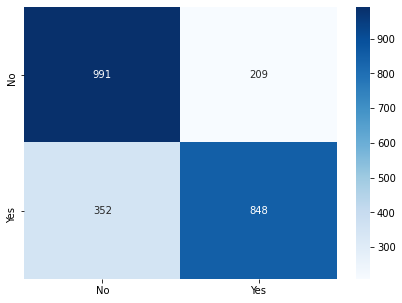

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g', cmap="Blues")

#Summary:
- Inception model was built using imagenet, transfer learning
- The model retrained post the first 10 layers, which has given much better results
- inception results have been really good, and quickly increases the train accuracy
- Sigmoid with Binary Cross Entropy has yielded really good results.
- Hyper parameters - learning rates, batch size decay have been tuned for better performance.
- The model has given 96% train accuracy and 76% Validation accuracy - In 10 epochs; The model is quickly overfitting thought the accuracy for validation is acceptable.
- The learning rate for vaidation hasnt increased from 76% from the 1st epoch.
- Classification report and confusion matrix shows good accuracy and the good False Negative